EDA Analysis using Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (using seaborn's built-in version for accessibility)
df = sns.load_dataset('titanic')

# Initial look
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Check missing value counts
print(df.isnull().sum())

# 1. Age: Impute with median (less sensitive to outliers)
df['age'] = df['age'].fillna(df['age'].median())

# 2. Embarked: Impute with the most frequent value (mode)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# 3. Deck/Cabin: Too many missing values (over 70%), we'll drop it
df.drop(columns=['deck'], inplace=True)

# 4. Drop rows with missing embark_town (very few)
df.dropna(subset=['embark_town'], inplace=True)

print("Missing values after cleaning:", df.isnull().sum().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Missing values after cleaning: 0


In [3]:
# Create Family Size (SibSp + Parch + 1 for themselves)
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Create a boolean feature for traveling alone
df['is_alone'] = (df['family_size'] == 1).astype(int)

# Binning Age into categories
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

df[['survived', 'family_size', 'is_alone', 'age_group']].head()

,survived,family_size,is_alone,age_group
0,0,2,0,Young Adult
1,1,2,0,Adult
2,1,1,1,Young Adult
3,1,2,0,Young Adult
4,0,1,1,Young Adult


C:\Users\Admin\AppData\Local\Temp\ipykernel_9516\1278978774.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, palette='magma')


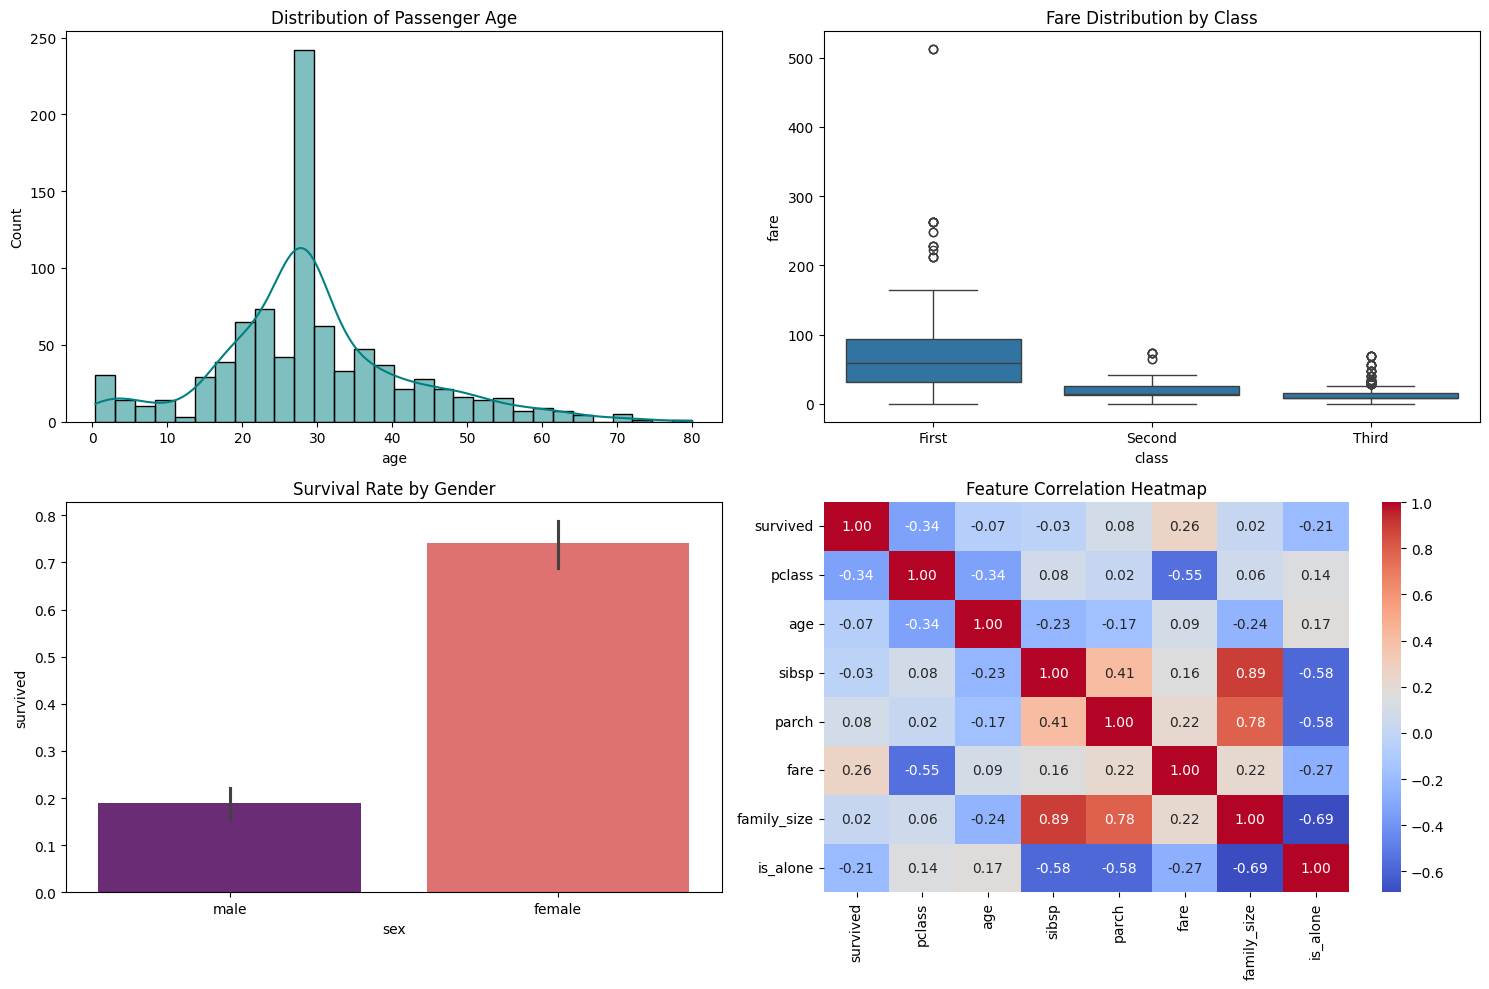

In [4]:
plt.figure(figsize=(15, 10))

# 1. Histogram: Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, color='teal')
plt.title('Distribution of Passenger Age')

# 2. Boxplot: Fare vs. Class (Checking for Outliers)
plt.subplot(2, 2, 2)
sns.boxplot(x='class', y='fare', data=df)
plt.title('Fare Distribution by Class')

# 3. Barplot: Survival Rate by Sex
plt.subplot(2, 2, 3)
sns.barplot(x='sex', y='survived', data=df, palette='magma')
plt.title('Survival Rate by Gender')

# 4. Correlation Heatmap
plt.subplot(2, 2, 4)
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

Key Insights:


Gender Bias: Females had a significantly higher survival rate than males, supporting the "women and children first" protocol.